In [3]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap 
import matplotlib.pyplot as plt

In [2]:
#Load dataset
df = pd.read_csv('winequality-red.csv')

In [5]:
#head of data (0-5 samples)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#find null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

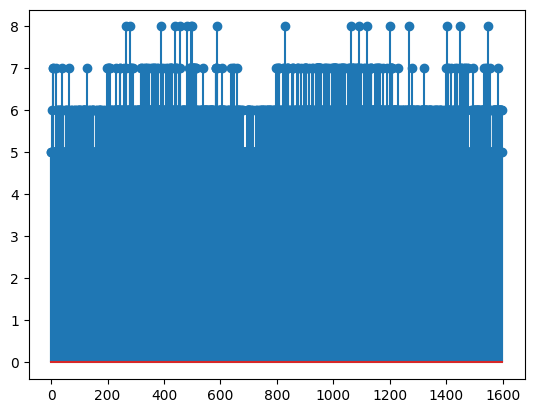

In [9]:
#plotting to check data 
plt.stem(df["quality"])
plt.show()

c:\Users\AL REHMAN LAPTOP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

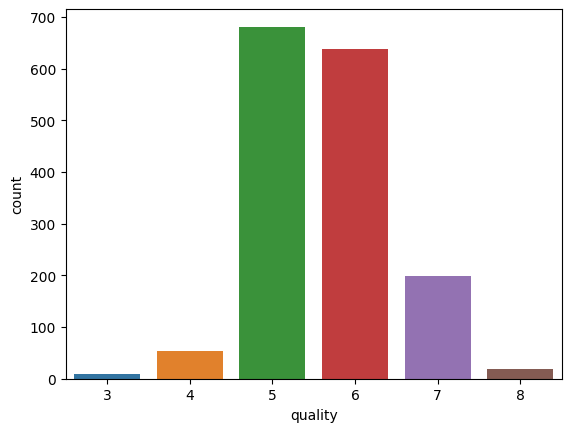

In [13]:
#plotting to check data (Countplot)
sns.countplot(df["quality"])

In [14]:
df["quality"].groupby(df["quality"]).count()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

### Heatmap of Analyzing Correlation:

### 1. The coefficient of correlation ranges from -1 to 1.
### 2. Unless two columns share the same correlation coefficient, they are irrelevant.
### 3. Columns have been positively correlated if the correlation coefficient is close to 1. It implies that both columns are proportional to one another. If the value in one column rises, the value in the other rises as well.
### 4. The columns are negatively correlated if the correlation coefficient is close to -1. That is, both columns are inversely proportional to each other. If one column value rises, the other falls, and vice versa.

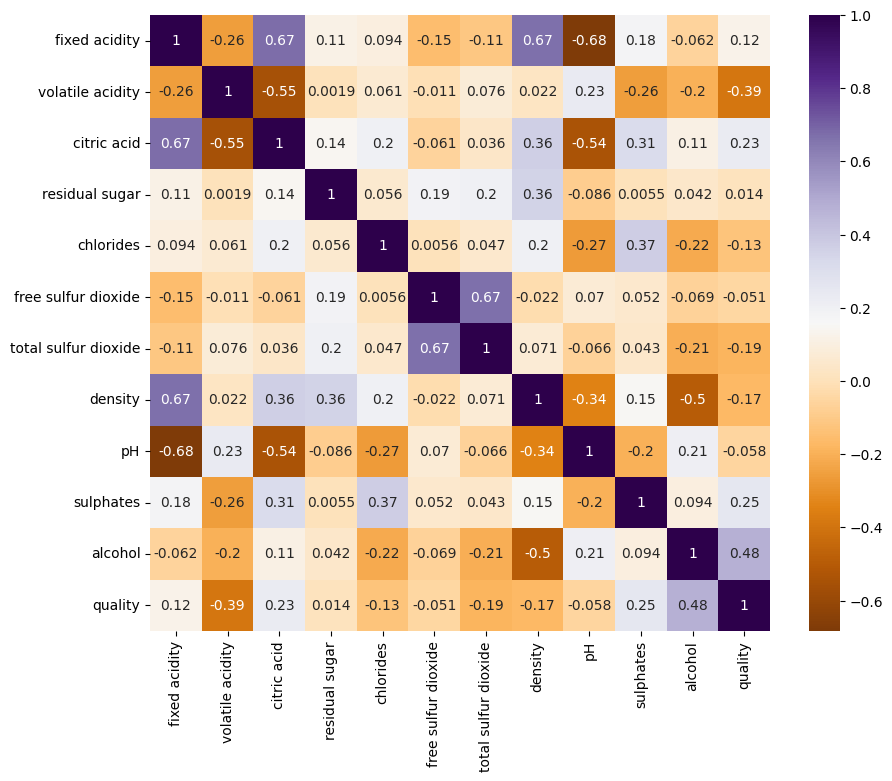

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="PuOr")
plt.show()

### 1. The coefficient of correlation between "citric acid" and "fixed acidity" in the above heatmap is 0.67. As a result, both columns seem to be 67% directly relevant.
### 2. The coefficient of correlation between "fixed acidity" as well as "ph" is -0.68. As a result, both are 68% negatively associated.

### Data Split into three catagories:
#### 1. If Quality is 1 to 6 => “good_quality : 0"
#### 2. If Quality is 7 to 10 => “good_quality : 1"

In [29]:
df["good_quality"] = [0 if i<7 else 1 for i in df["quality"]]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [31]:
df["good_quality"].groupby(df["good_quality"]).count()

good_quality
0    1382
1     217
Name: good_quality, dtype: int64

### Splitting of Features and Labels:

In [32]:
X = df.drop(["good_quality", "quality"], axis=1)
y = df["good_quality"]

### Feature Normalization:

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Test and Train Split:

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
print("Number of samples in training set:", X_train.shape[0])
print("Number of samples in testing set:", X_test.shape[0])

Number of samples in training set: 1279
Number of samples in testing set: 320


### Building a Model:

In [35]:
#model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)

### Fitting the Model:

In [36]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### Prediction of Model:

In [37]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print("Accuracy", score)

Accuracy 0.90625


### The accuracy of the model is 90%

#### Results:

In [39]:
results_series = {"actual":y_test, "predicted":y_pred}
results = pd.DataFrame(results_series)
print("*** First 5 rows of results ***")
results.head()

*** First 5 rows of results ***


,actual,predicted
1109,0,0
1032,0,0
1002,1,1
487,0,0
979,0,0


### Feature Importance Analze:

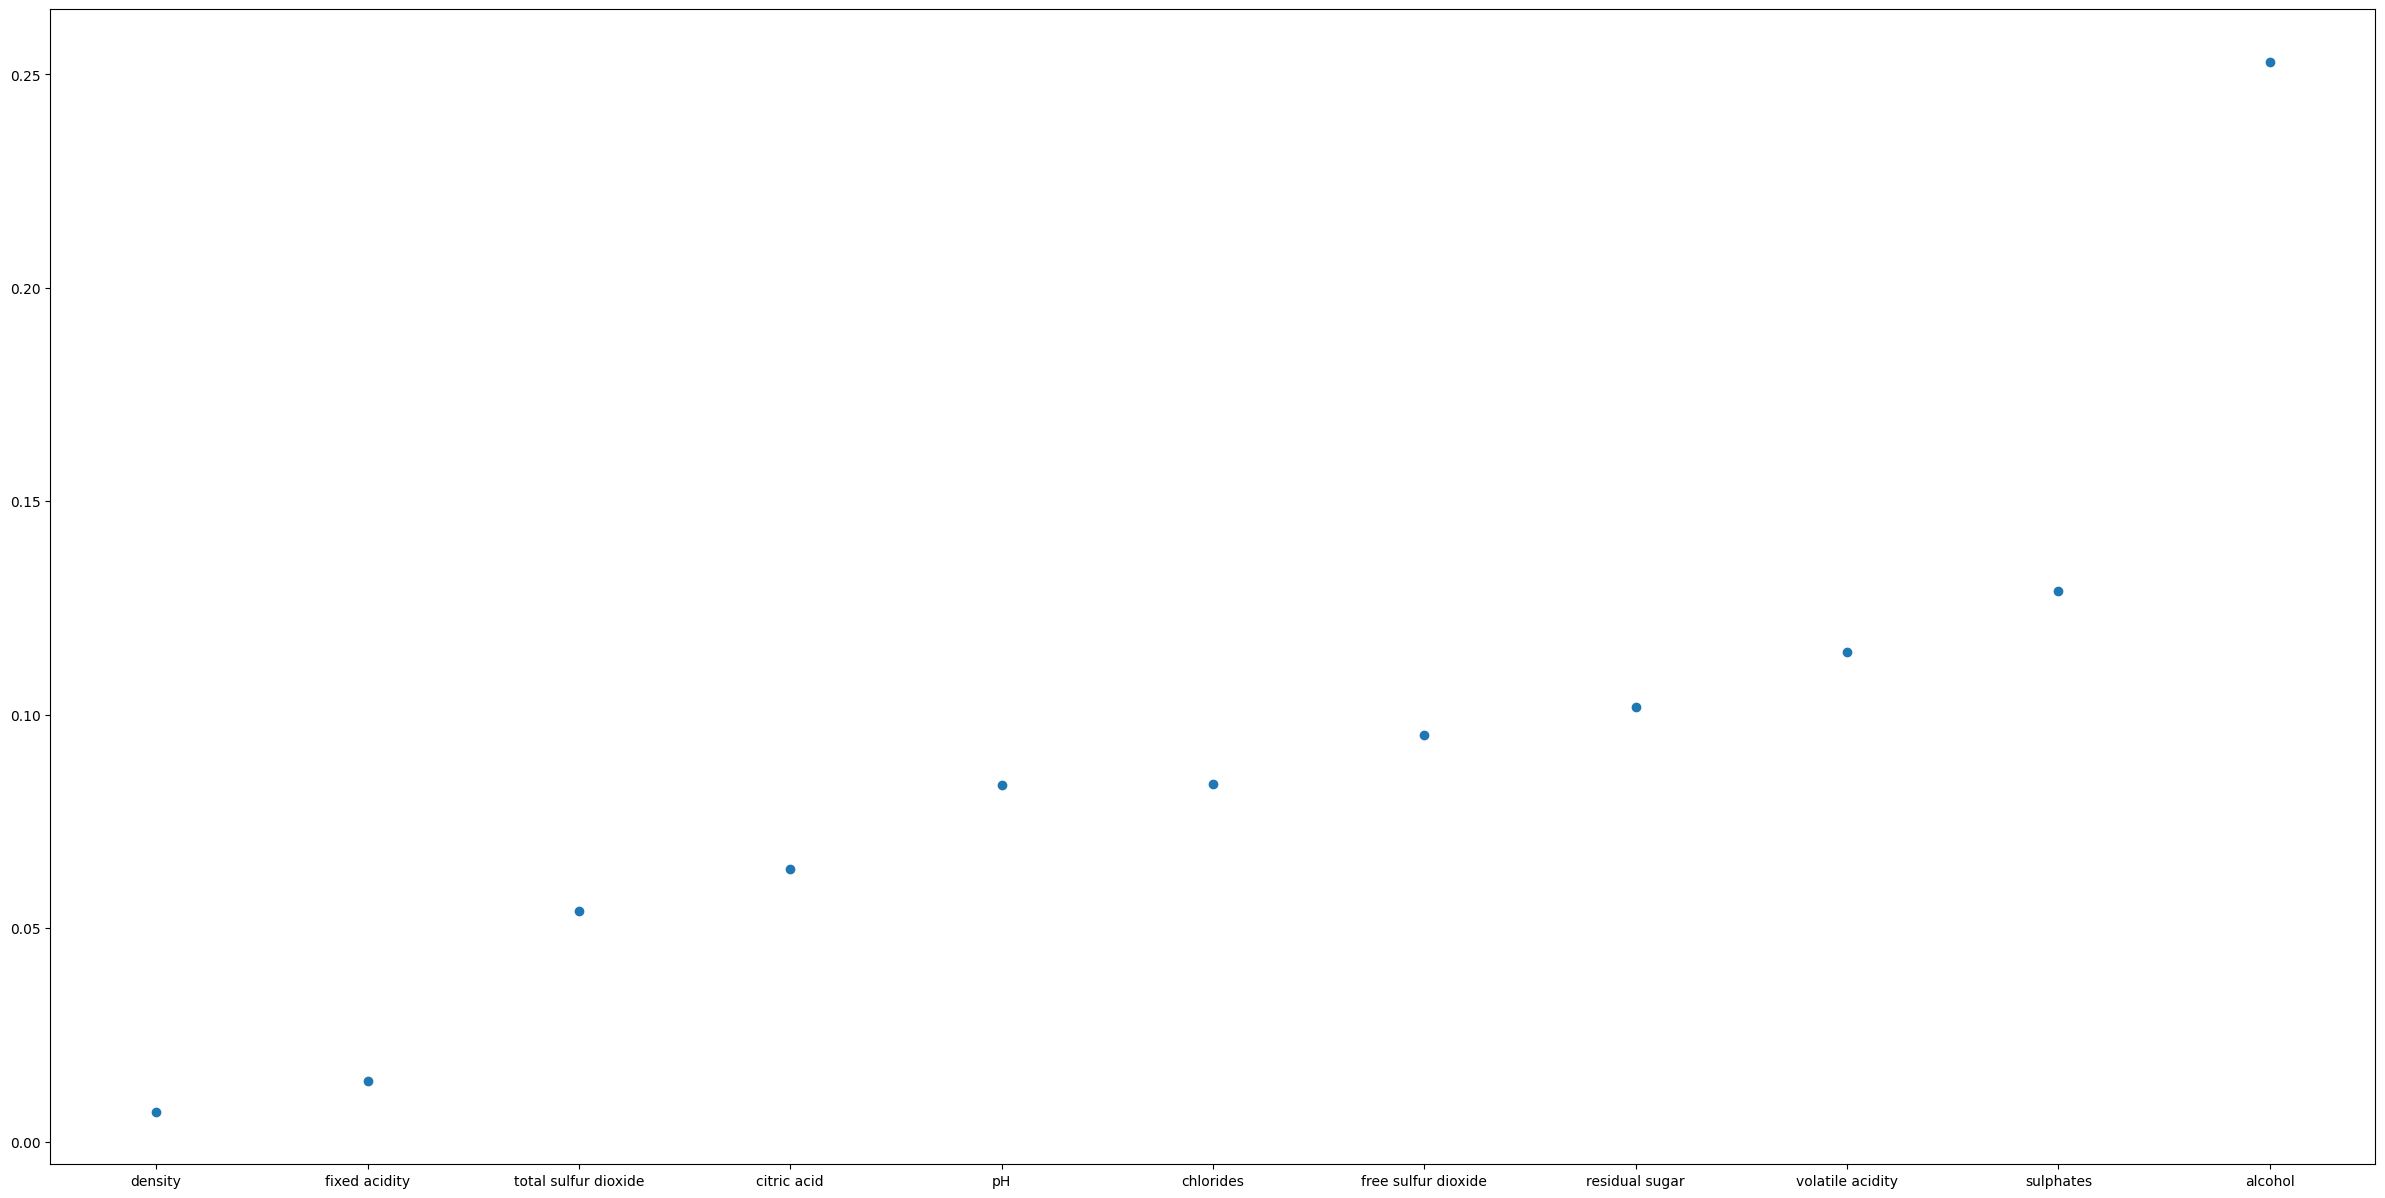

In [45]:
#visualization
plt.figure(figsize=(30,15))
s = {'col1':X.columns, 'col2':model.feature_importances_}
df = pd.DataFrame(s)
df_sorted = df.sort_values('col2')
plt.scatter(df_sorted["col1"], df_sorted["col2"])
plt.show()

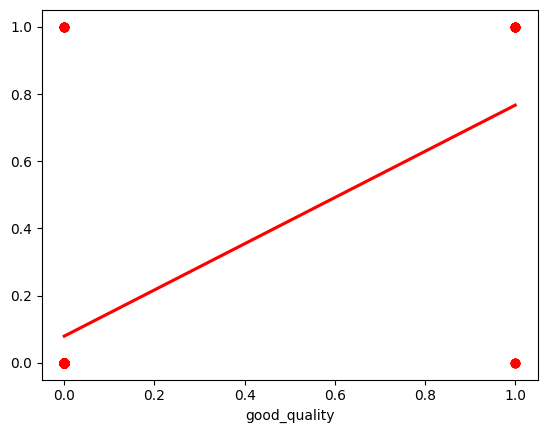

In [46]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

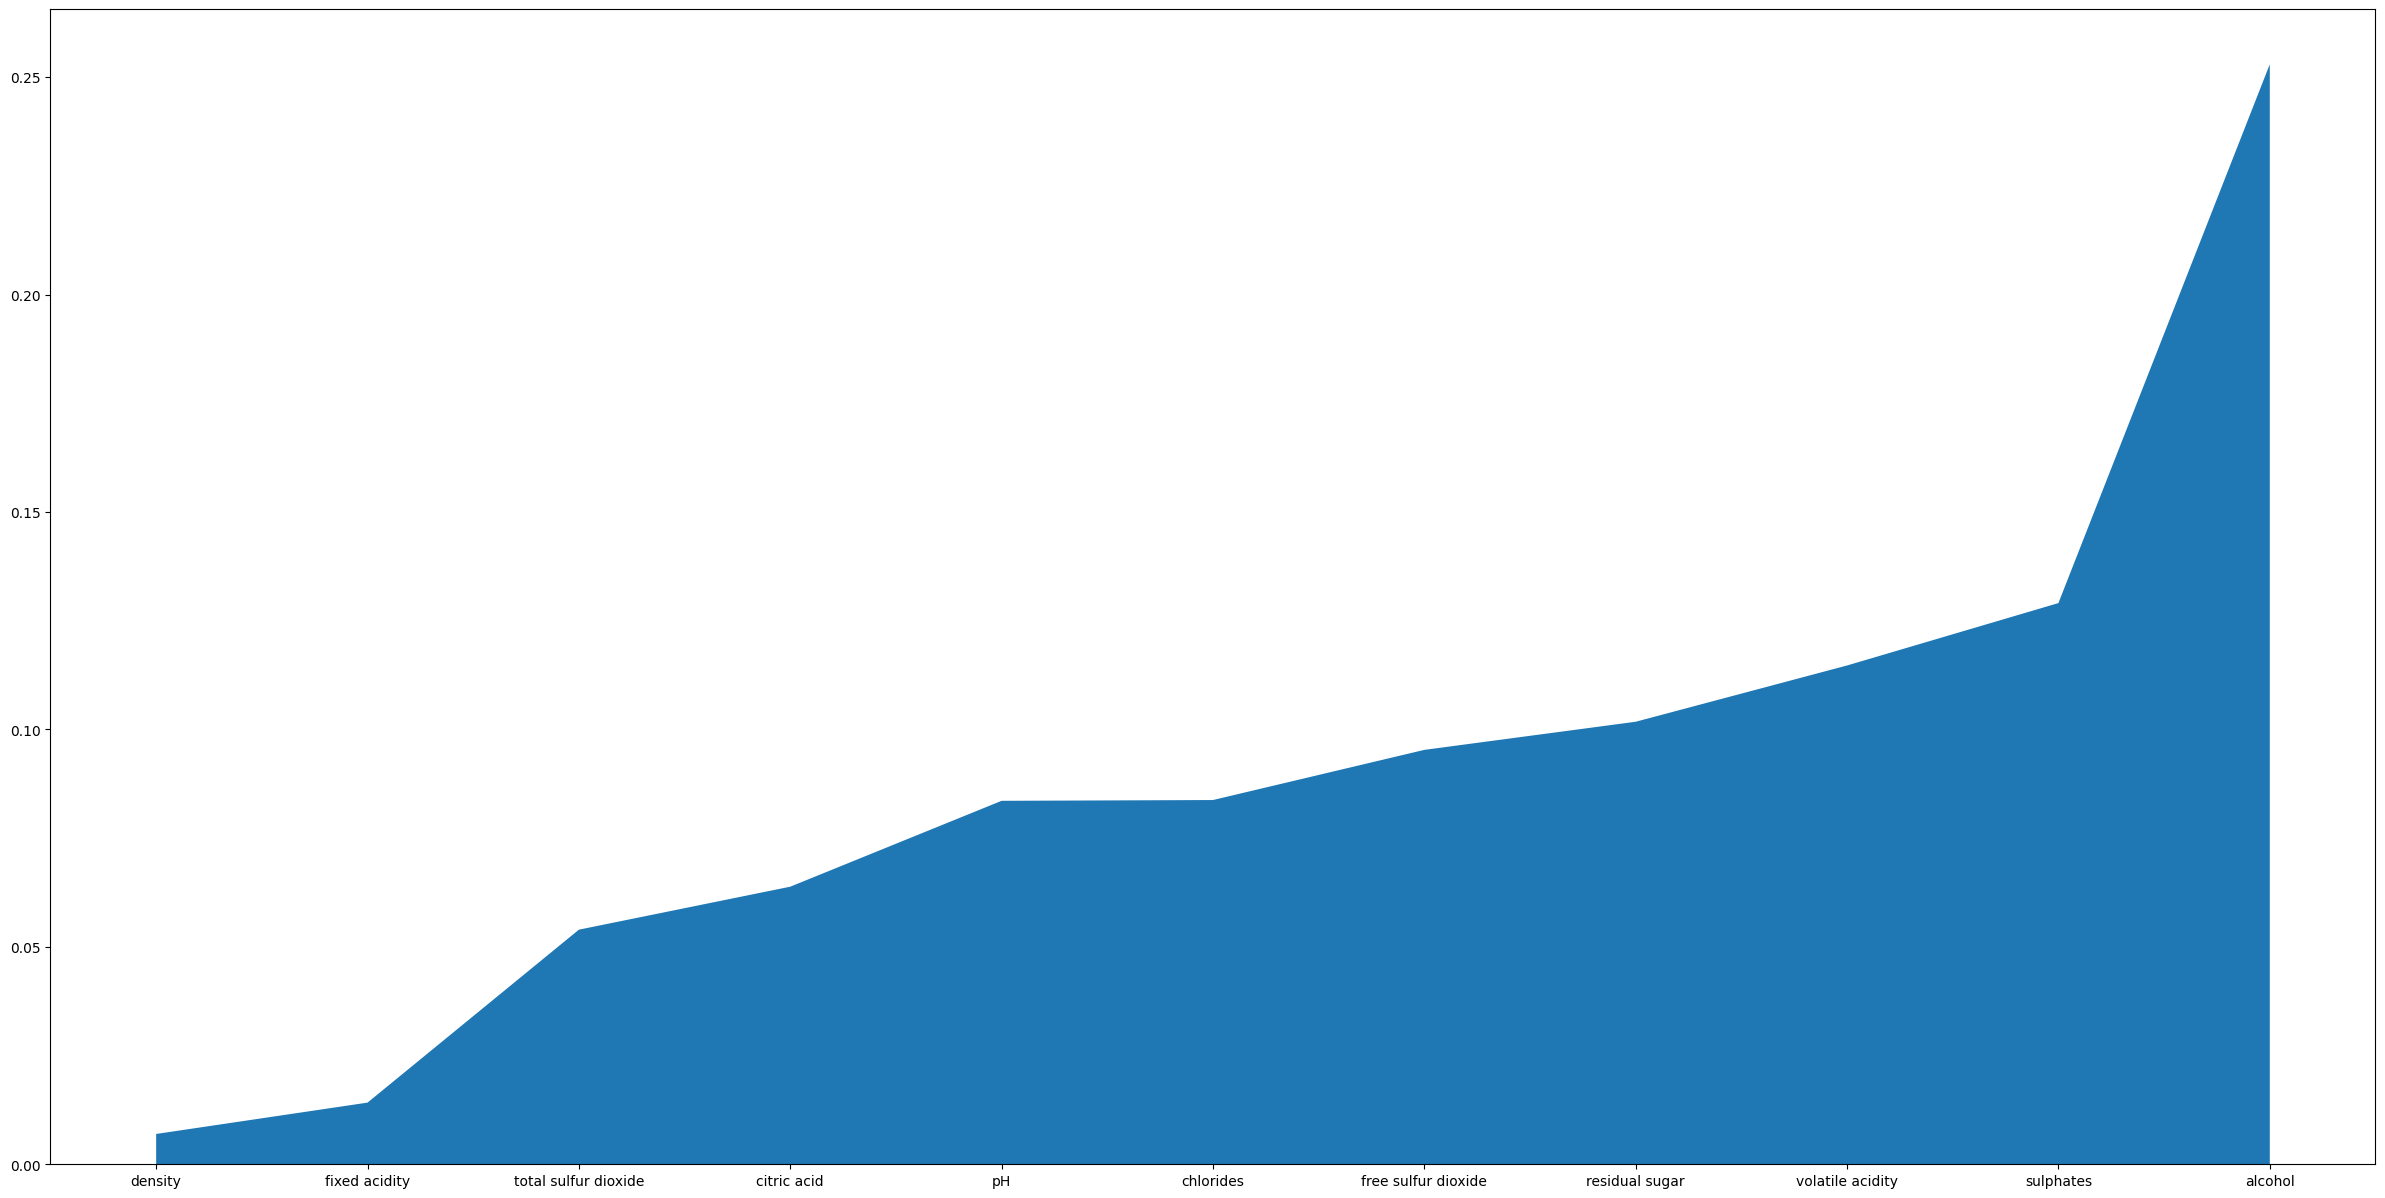

In [44]:
#visualization 
plt.figure(figsize=(30,15))
s = {'col1':X.columns, 'col2':model.feature_importances_}
df = pd.DataFrame(s)
df_sorted = df.sort_values('col2')
plt.stackplot(df_sorted["col1"], df_sorted["col2"])
plt.show()

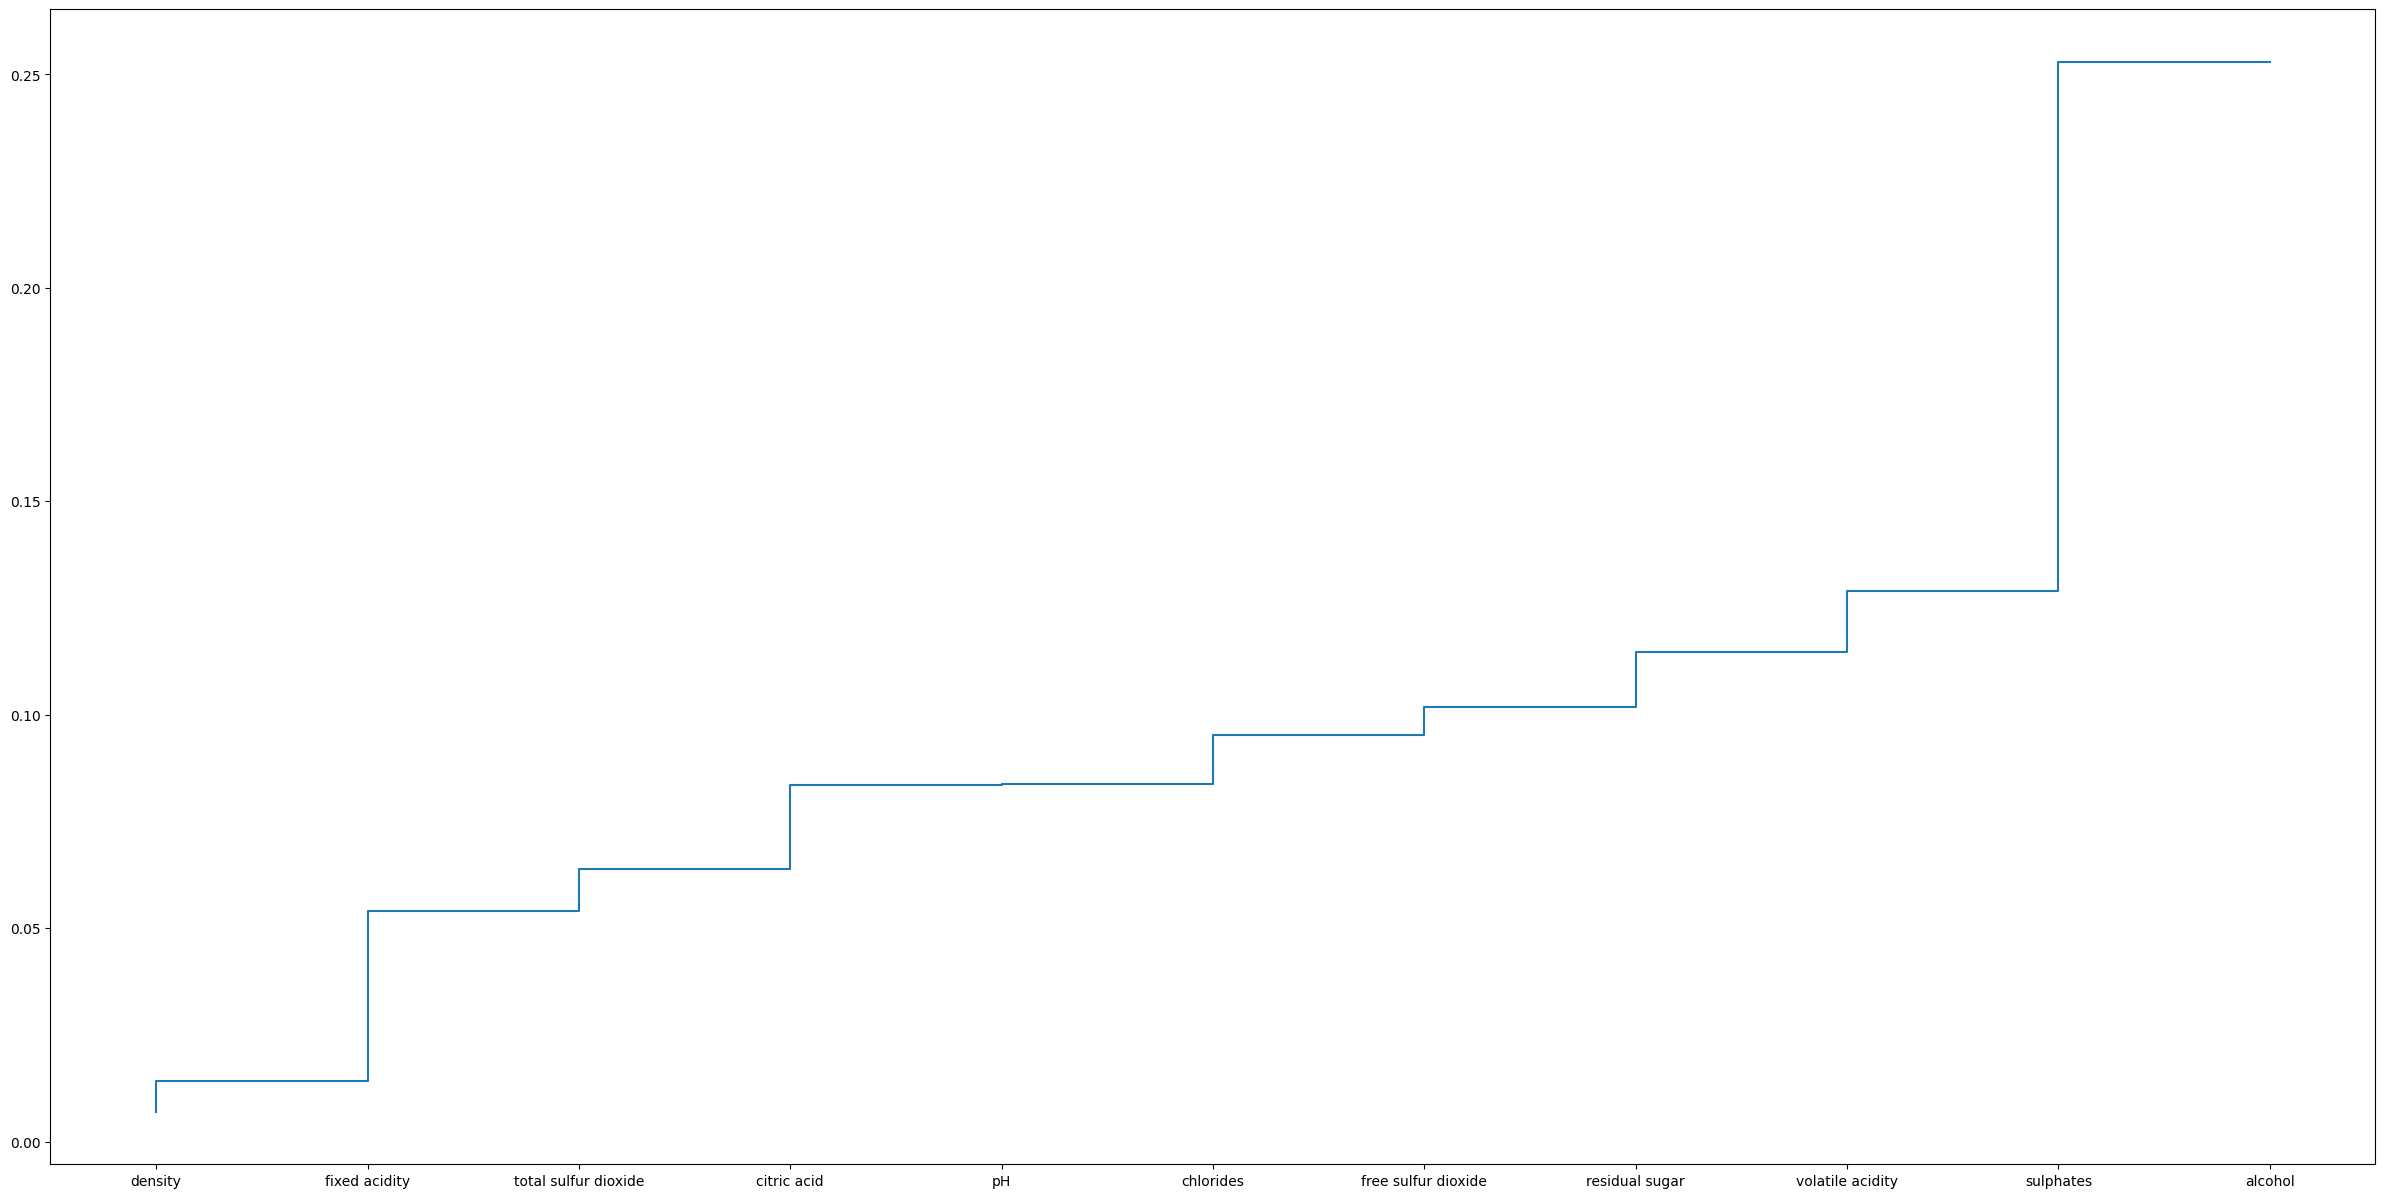

In [47]:
#visualization 
plt.figure(figsize=(30,15))
s = {'col1':X.columns, 'col2':model.feature_importances_}
df = pd.DataFrame(s)
df_sorted = df.sort_values('col2')
plt.step(df_sorted["col1"], df_sorted["col2"])
plt.show()

### This decision tree model regards the "alcohol" feature as extremely useful for prediction. Furthermore, the "citric acid" feature is the least useful for prediction. (This chart only applies to this model.)

Text(0.5, 1.0, 'Decision tree Trained model of Wine data')

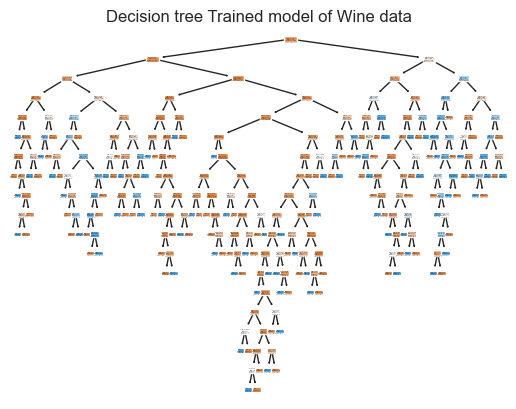

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model = DecisionTreeClassifier().fit(X, y)
plot_tree (model, filled=True)
plt.title("Decision tree Trained model of Wine data")

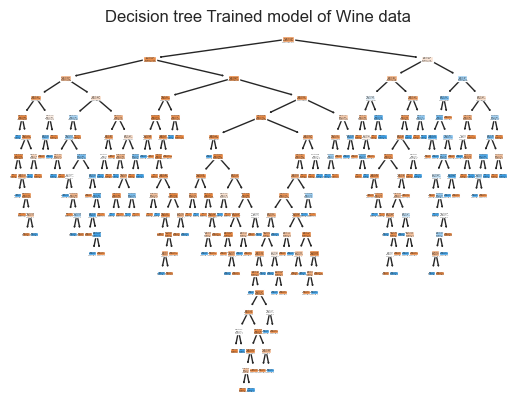

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model = DecisionTreeClassifier().fit(X, y)
plot_tree (model, filled=True)
plt.title("Decision tree Trained model of Wine data")

# how to save this plot in tif, png and pdf files, in HD qualitiy
#plt.savefig('DecisionTree.png', dpi=300)
plt.savefig('result.png', dpi=600, format = "png",
            facecolor='white', edgecolor ='none',
            pil_kwargs = None)

<center>
<h2><b>The End</b></h2>
------------------------------------------------------------------------------------------------------------------------------------------
</center>